In [1]:
%matplotlib notebook

In [2]:
# Dependencies numpy as 'np', requests, matplotlib's pyplot as "plt", pandas as "pd", pprint as pprint,
# and your config file for api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
from config import api_key


In [52]:
# Set the base URL for Yelp and parameters for category and location

url = "https://api.yelp.com/v3/businesses/search?term="
category = "chinese"
location = "san francisco"

# Create the query URL with the parameters given as well as an additional parameter of "&limit=50"
# hint - remember that parameters in a given query url are separated by "&"

query_url = url + category + "&location=" + location + "&limit=50"

# headers are a bearer token that is required by Yelp's API. We have provided this for you
headers = {"authorization" : "Bearer " + api_key}

In [4]:
# Call the API and store the response as a JSON
# Print the JSON object
response = requests.get(query_url, headers=headers).json()
pprint(response)

{'businesses': [{'alias': 'san-tung-san-francisco-2',
                 'categories': [{'alias': 'chinese', 'title': 'Chinese'},
                                {'alias': 'chicken_wings',
                                 'title': 'Chicken Wings'},
                                {'alias': 'noodles', 'title': 'Noodles'}],
                 'coordinates': {'latitude': 37.76367, 'longitude': -122.46896},
                 'display_phone': '(415) 242-0828',
                 'distance': 2877.9920007894843,
                 'id': 'M0JTO3oyu6gxh1mfFjU-dA',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/bBKx0vw4X5IGlEbUPYKJFw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '1031 Irving St',
                              'address2': '',
                              'address3': '',
                              'city': 'San Francisco',
                              'country': 'US',
                              'display_address': ['103

                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/e2vZEYO_warsw5yFMtcifg/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '2555 Judah St',
                              'address2': '',
                              'address3': '',
                              'city': 'San Francisco',
                              'country': 'US',
                              'display_address': ['2555 Judah St',
                                                  'San Francisco, CA 94122'],
                              'state': 'CA',
                              'zip_code': '94122'},
                 'name': 'Terra Cotta Warrior',
                 'phone': '+14156813288',
                 'price': '$$',
                 'rating': 3.5,
                 'review_count': 423,
                 'transactions': [],
                 'url': 'https://www.yelp.com/biz/terra-cotta-warrior-san-francisco?adjust_creative=WhQC49z35m23-OtGzH5waA&utm_campaign=y

In [5]:
# Create the following variables and set them to empty lists
# zipcode_list, rating_list

zipcode_list = []
rating_list = []

# Iterate through the JSON object and append the zip codes to zipcode_list and ratings to rating_list

for business in response['businesses']:
    zipcode_list.append(business["location"]["zip_code"])
    rating_list.append(business["rating"])
    
    
# print both lists to check if you've grabbed the correct data

print (zipcode_list)
print (rating_list)

['94122', '94118', '94133', '94108', '94115', '94118', '94118', '94110', '94133', '94116', '94111', '94110', '94121', '94118', '94110', '94103', '94108', '94108', '94133', '94108', '94122', '94117', '94127', '94109', '94114', '94122', '94131', '94102', '94133', '94109', '94131', '94121', '94133', '94116', '94114', '94122', '94103', '94110', '94133', '94133', '94112', '94117', '94112', '94112', '94105', '94114', '94121', '94108', '94108', '94103']
[4.0, 4.5, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 4.5, 4.0, 3.5, 4.0, 4.0, 3.5, 5.0, 4.0, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.5, 4.5, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5]


In [6]:
# Create a dictionary that contains zip code and rating
yelp_dictionary = {
    'zip_code' : zipcode_list,
    'rating' : rating_list
}

# Convert the dictionary to a panda dataframe and display it
yelp_data = pd.DataFrame(yelp_dictionary)
yelp_data.head()

,zip_code,rating
0,94122,4.0
1,94118,4.5
2,94133,3.5
3,94108,4.0
4,94115,4.0


In [7]:
# Declare a variable called 'zip_group' and find the average rating for each zip code

zip_group = yelp_data.groupby('zip_code', as_index=False).mean()
zip_group

,zip_code,rating
0,94102,4.000000
1,94103,4.000000
2,94105,3.500000
3,94108,3.916667
4,94109,4.000000
5,94110,3.625000
6,94111,4.000000
7,94112,4.000000
8,94114,3.666667
9,94115,4.000000


In [8]:
# Create an x-axis based on the length of zip_group's ratings
x_axis = np.arange(len(zip_group["rating"]))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

<IPython.core.display.Javascript object>


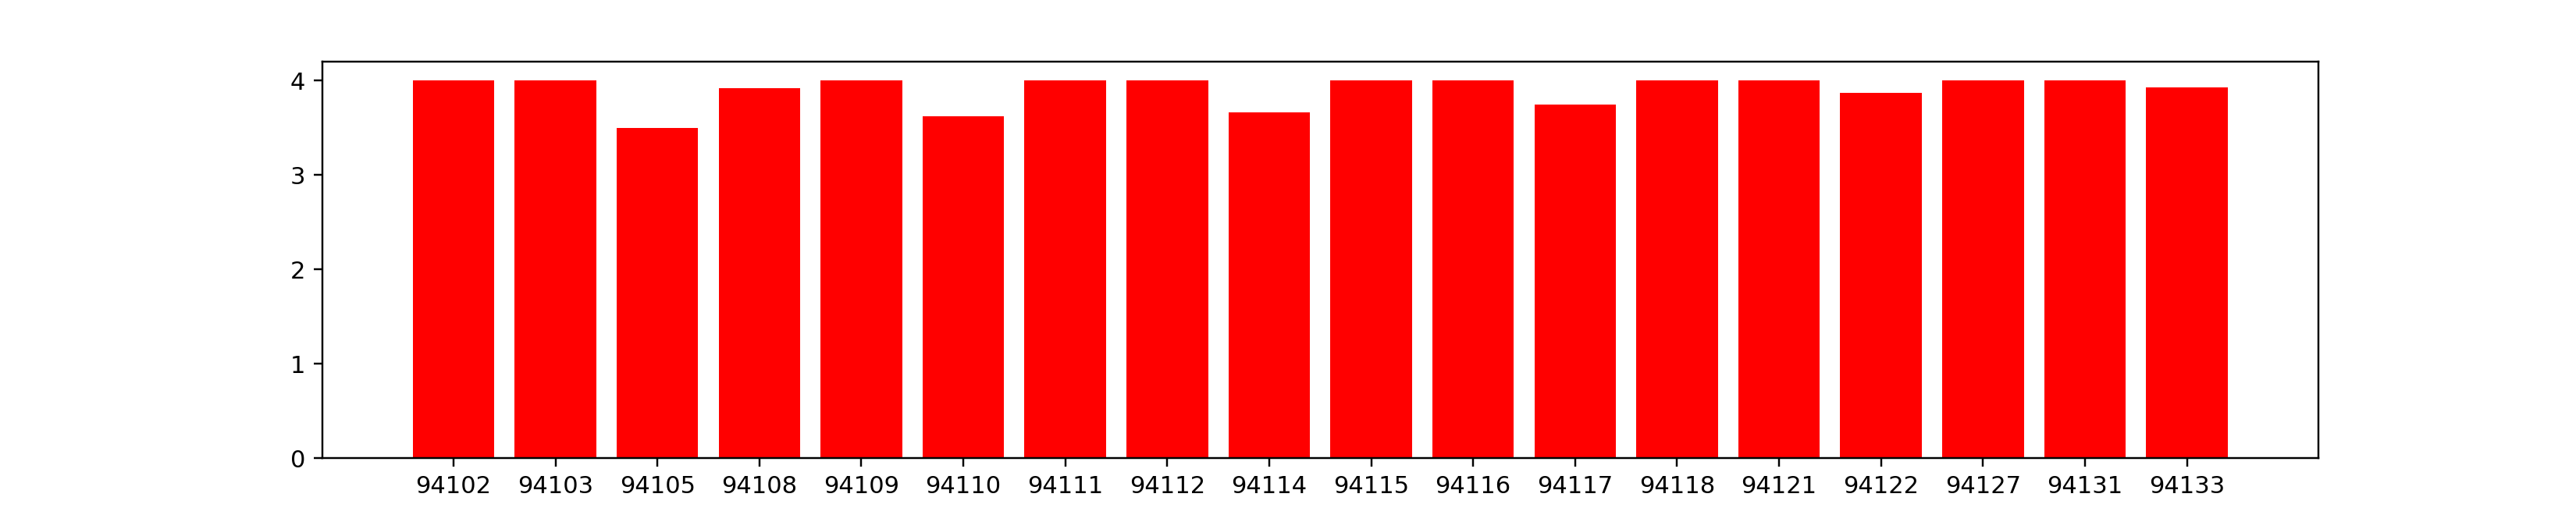

<BarContainer object of 18 artists>

In [49]:
# Plot the figure with a width of 15 and height of 3
plt.figure(figsize=(15, 3)) 

#Plot the data in a bar graph based on the ratings
plt.bar(x_axis, zip_group['rating'], color="r", align='center')

In [51]:
# 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zip_group['zip_code'])

([<matplotlib.axis.XTick at 0x116928d30>,
 <a list of 18 Text xticklabel objects>)